In [1]:
import os

def find_files_with_keyword(path, keyword):
    keyword = keyword.lower()
    matching_files_dict= {}  # 키워드를 포함하는 파일 목록을 저장할 리스트
    for root, dirs, files in os.walk(path):
        matching_files = []
        for file in files:
            if keyword in file.lower():
                matching_files.append(file)
        if len(matching_files) > 0 :
            matching_files_dict[root] = matching_files
    return matching_files_dict


In [6]:
keyword_to_find = "heap"
path_to_find = 'c:\\Users\\yaffl\\OneDrive\\Coding\\24H1_QE_Coding\\cheatsheet'
find_files_with_keyword(path=path_to_find, keyword=keyword_to_find)

{'c:\\Users\\yaffl\\OneDrive\\Coding\\24H1_QE_Coding\\cheatsheet\\DSAlgo\\01_LeetCode': ['0787. Cheapest Flights Within K Stops.md'],
 'c:\\Users\\yaffl\\OneDrive\\Coding\\24H1_QE_Coding\\cheatsheet\\DSAlgo\\03_Sorting-Algorithms': ['Heap Sort.py'],
 'c:\\Users\\yaffl\\OneDrive\\Coding\\24H1_QE_Coding\\cheatsheet\\DSAlgo\\07_Graph\\Dijkstras Shortest Path Algorithm on Graph': ['03. Cheapest Flights Within K Stops - using Dijkstra.py'],
 'c:\\Users\\yaffl\\OneDrive\\Coding\\24H1_QE_Coding\\cheatsheet\\DSAlgo\\08_Heap\\Max Heap': ['Max_Heap_impementation.py'],
 'c:\\Users\\yaffl\\OneDrive\\Coding\\24H1_QE_Coding\\cheatsheet\\DSAlgo\\08_Heap\\Min Heap': ['Min_Heap_implementation.py'],
 'c:\\Users\\yaffl\\OneDrive\\Coding\\24H1_QE_Coding\\cheatsheet\\DSAlgo\\30-Days-SDE-Sheet-Practice\\22. Day 22 Heap': ['03. Top K Frequent Elements NOT USING HEAP.py']}

# 948. Bag of Tokens
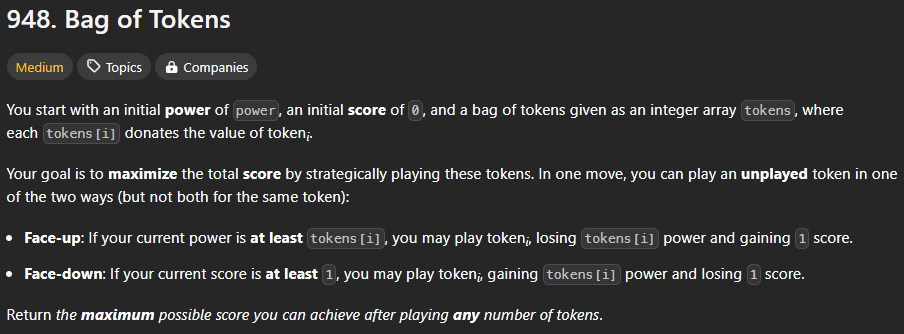

In [7]:
from typing import List
# Not passed all testcases
class Solution:
    def bagOfTokensScore(self, tokens: List[int], power: int) -> int:
        score, score1, score2 = 0, 0, 0
        for i in range(len(tokens)):
            # Face-up: gaining score
            if power >= tokens[i]:
                score1 += 1
                power -= tokens[i]
            # Face-down: losing score
            if score >= 1:
                power += tokens[i]
                score2 -= 1
            score = max(score1, score2)

        return score

In [24]:
from typing import List
from collections import deque

class Solution:
    def bagOfTokensScore(self, tokens: List[int], power: int) -> int:
        score = cur = 0
        q = deque(sorted(tokens))
        while q and (q[0]<= power or cur):
            if q[0] <= power:
                power -= q.popleft() # get the smallest one (q[0]) out of the queue
                cur += 1
            else:
                power += q.pop() # get the largest vale and add it to the power
                cur -= 1 
            score = max(cur, score)

        return score

In [25]:
tokens = [43,61,92]
power = 92
Solution().bagOfTokensScore(tokens, power) # 1

1

In [26]:
tokens = [200,100]
power = 150
Solution().bagOfTokensScore(tokens, power) # 1

1

In [27]:
tokens = [100,200,300,400]
power = 200
Solution().bagOfTokensScore(tokens, power) # 2

2

# 219. Contains Duplicate II

In [31]:
from typing import List
class Solution:
    def containsNearbyDuplicate(self, nums: List[int], k: int) -> bool:
        index_dict = {}


        for i, n in enumerate(nums):
            if n in index_dict and i - index_dict[n] <= k:
                return True

            index_dict[n] = i

        return False

class Solution:
    def containsNearbyDuplicate(self, nums: List[int], k: int) -> bool:
        # Create hset for storing previous of k elements...
        hset = {}
        # Traverse for all elements of the given array in a for loop...
        for idx in range(len(nums)):
            # If duplicate element is present at distance less than equal to k, return true...
            if nums[idx] in hset and abs(idx - hset[nums[idx]]) <= k:
                return True
            hset[nums[idx]] = idx
        # If no duplicate element is found then return false...
        return False

In [32]:
nums = [1,2,3,1]
k = 3
Solution().containsNearbyDuplicate(nums, k) # True

True

In [33]:
nums = [1,2,3,1,2,3]
k = 2
Solution().containsNearbyDuplicate(nums, k) # False

False

In [34]:
nums = [99,99]
k = 2
Solution().containsNearbyDuplicate(nums, k) # True

True

# 19. Remove Nth Node from end of list

In [50]:
# Definition for singly-linked list.
class Node:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def removeNthFromEnd(self, head: Node, n: int) -> Node:
        ptr = 0
        dummy = first = second = ListNode(0)
        dummy.next = head
        while ptr != n:
            first = first.next
            ptr += 1

        while first.next:
            first = first.next
            second = second.next

        second.next = second.next.next

        return dummy.next
   
        
        

In [51]:
s = Node(1,Node(2,Node(3, Node(4, Node(5))))) #3->7->7->3->None
n = 2
Solution().removeNthFromEnd(s, n)